<a href="https://colab.research.google.com/github/fatemehra10/weather-crawl-/blob/main/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import files
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, jaccard_score, recall_score, f1_score, ConfusionMatrixDisplay

In [4]:
drive.mount('/content/drive')
main_path = '/content/drive/My Drive/Da final/final_weathers.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [5]:
#Read data
weather = pd.read_csv(main_path)
weather

,time,date,city,temp_mean,temp_max,temp_min,wind,wind_direction,humidity,barometer,visibility,weather
0,morning,1 December 2022,Shiraz,6.33,9.0,4.0,0.00,0.00,0.00,66.33,1019.67,Clear
1,midday,1 December 2022,Shiraz,18.33,21.0,15.0,2.00,2.00,40.00,31.33,1017.33,Passing clouds
2,night,1 December 2022,Shiraz,17.00,17.0,17.0,7.00,7.00,280.00,32.00,1018.00,Haze
3,morning,2 December 2022,Shiraz,6.33,9.0,4.0,0.00,0.00,0.00,67.00,1018.33,Clear
4,midday,2 December 2022,Shiraz,17.33,19.0,14.0,0.00,0.00,0.00,37.00,1015.00,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
22947,midday,30 January 2020,Mashhad,7.62,10.0,2.0,8.56,8.56,131.25,47.31,1015.50,Partly sunny
22948,night,30 January 2020,Mashhad,6.20,9.0,3.0,8.47,8.47,170.67,59.87,1016.33,Passing clouds
22949,morning,31 January 2020,Mashhad,0.44,1.0,-1.0,1.31,1.31,35.62,89.06,1016.25,Clear
22950,midday,31 January 2020,Mashhad,9.31,13.0,3.0,5.88,5.88,48.12,48.25,1015.44,Sunny


In [6]:
# Convert datatypes
weather.time = weather.time.astype('category')
weather.date = pd.to_datetime(weather.date)
weather.city = weather.city.astype('category')
weather.weather = weather.weather.astype('category')

### *Handle NAN*

In [7]:
weather[weather.isna().any(axis = 1)].head()

,time,date,city,temp_mean,temp_max,temp_min,wind,wind_direction,humidity,barometer,visibility,weather
50,night,2022-12-17,Shiraz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,midday,2022-12-19,Shiraz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,night,2022-12-19,Shiraz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,night,2022-12-24,Shiraz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,morning,2022-11-02,Shiraz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
weather.dropna(inplace = True)

In [9]:
weather.to_csv('clean_weather.csv', index = False)

### *Clean Data*

In [10]:
weather.weather = weather.weather.apply(lambda x: x.strip())
weather.weather.value_counts()

Clear                      7283
Passing clouds             5628
Sunny                      4296
Scattered clouds           1411
Partly sunny                738
Fog                         664
Overcast                    533
Haze                        531
Broken clouds               450
Partly cloudy               253
Ice fog                     176
Mostly cloudy               144
More clouds than sun        135
Light rain                  130
Duststorm                    51
Light snow                   38
Rain                         38
Scattered showers            36
Thunderstorms                20
Sandstorm                    20
Sprinkles                    19
Low clouds                   15
Thundershowers               12
Snow                          8
Dense fog                     7
Drizzle                       5
Low level haze                5
Snow flurries                 4
Light mixture of precip       3
Light freezing rain           1
Rain showers                  1
Cloudy  

In [11]:
dict_weather = {
   'Scattered clouds' : 'Cloudy',
   'Overcast': 'Cloudy',
   'Broken clouds': 'Cloudy',
   'Mostly cloudy':'Cloudy',
   'More clouds than sun':'Cloudy',
   'Passing clouds' : 'Cloudy',
   'Partly sunny' : 'Sunny',
   'Haze':'Fog',
   'Ice fog' : 'Fog',
   'Light rain' : 'Rain',
   'Light snow' : 'Snow',
   'Scattered showers' : 'Rain',
   'Duststorm' : 'Storm',
   'Sandstorm' : 'Storm',
   'Sprinkles' : 'Rain',
   'Low clouds' : 'Cloudy',
    'Thunderstorms': 'Thunder',
    'Thundershowers' : 'Thunder',
    'Dense fog' : 'Fog',
    'Drizzle' : 'Rain',
    'Low level haze' : 'Fog',
    'Snow flurries' : 'Snow',    
    'Light mixture of precip' : 'Snow',
    'Light freezing rain' : 'Rain',
    'Rain showers' : 'Rain',
    'Heavy snow': 'Snow',
    'Partly cloudy' : 'Cloudy',
}



In [12]:
def clean_target(x):
  if x in dict_weather.keys():
    return dict_weather[x]
  else:
    return x

weather.weather = weather.weather.apply(clean_target)

In [13]:
weather.weather.value_counts()

Cloudy     8570
Clear      7283
Sunny      5034
Fog        1383
Rain        230
Storm        71
Snow         54
Thunder      32
Name: weather, dtype: int64

Text(0.5, 1.0, 'Hostogram weather')

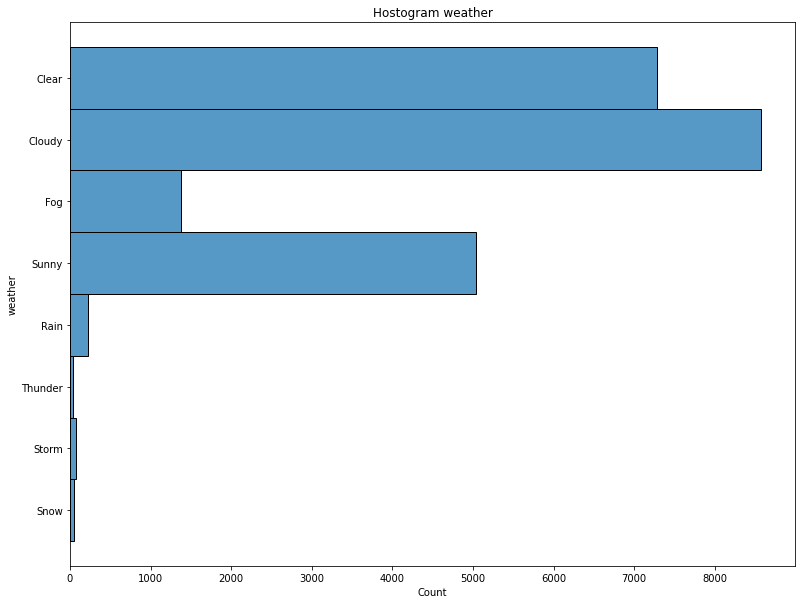

In [14]:
plt.figure(figsize=(13,10))
sns.histplot(data = weather , y = 'weather')
plt.title('Hostogram weather')


In [15]:
# convert date to three column
year = weather.date.dt.year
month = weather.date.dt.month
day = weather.date.dt.day

In [16]:
weather.insert(1,'year',year)
weather.insert(1,'month',month)
weather.insert(1,'day',day)

In [17]:
# drop date column
weather.drop(['date'], axis = 1, inplace = True)

In [18]:
weather.head()

,time,day,month,year,city,temp_mean,temp_max,temp_min,wind,wind_direction,humidity,barometer,visibility,weather
0,morning,1,12,2022,Shiraz,6.33,9.0,4.0,0.0,0.0,0.0,66.33,1019.67,Clear
1,midday,1,12,2022,Shiraz,18.33,21.0,15.0,2.0,2.0,40.0,31.33,1017.33,Cloudy
2,night,1,12,2022,Shiraz,17.00,17.0,17.0,7.0,7.0,280.0,32.00,1018.00,Fog
3,morning,2,12,2022,Shiraz,6.33,9.0,4.0,0.0,0.0,0.0,67.00,1018.33,Clear
4,midday,2,12,2022,Shiraz,17.33,19.0,14.0,0.0,0.0,0.0,37.00,1015.00,Sunny


### *Covert categorical column to numerical*


In [19]:
cities = np.array([weather.city.unique(),weather.city.cat.codes.unique()])  

In [20]:
weather.city = weather.city.cat.codes
weather.time = weather.time.cat.codes

### *Handle imbalanced classes*

In [21]:
sm = SMOTE(random_state = 3)
X_res, y_res = sm.fit_resample(weather.iloc[:,:-1], weather.iloc[:,-1])
y_res.value_counts()

Clear      8570
Cloudy     8570
Fog        8570
Sunny      8570
Rain       8570
Thunder    8570
Storm      8570
Snow       8570
Name: weather, dtype: int64

# Exploratory Analysis

### *Part 1*

In [22]:
y_res = y_res.astype('category')

In [23]:
y = y_res.cat.codes

In [24]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_res, y, train_size = .7,random_state= 20)

In [25]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [26]:
forest_imp = forest.feature_importances_
forest_imp 

array([0.09723007, 0.05175455, 0.08051573, 0.02228457, 0.04661305,
       0.04406291, 0.20810694, 0.04512333, 0.05004742, 0.05380555,
       0.08484929, 0.14071337, 0.07489321])

### *Part 2*

# Reduction dimension

# Classification

### *Part 1*

In [27]:
classes = y_res.unique()

##### *MLP Classifier*

In [34]:
clf = MLPClassifier( alpha=0.001,
                    hidden_layer_sizes=(12,25,38,50),)

In [35]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test , y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7437281213535589

##### Decision Tree Classifier

0.7363380007779075


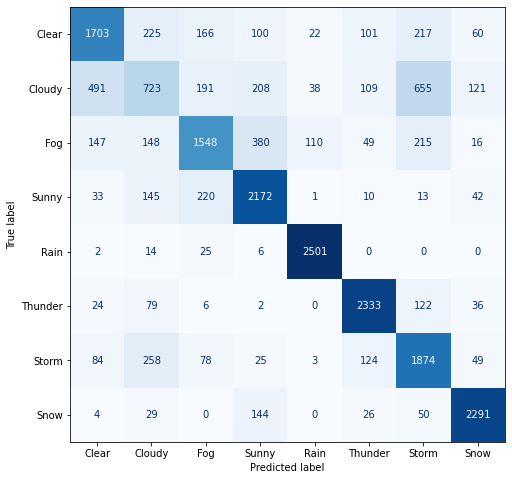

In [69]:
model = DecisionTreeClassifier( random_state=42,max_depth=10, min_samples_leaf=5)   
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print(accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax =  plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= classes)
disp.plot(cmap = plt.cm.Blues , colorbar = False, ax = ax)

##### *RandomForest Classifier*

0.8766044340723453


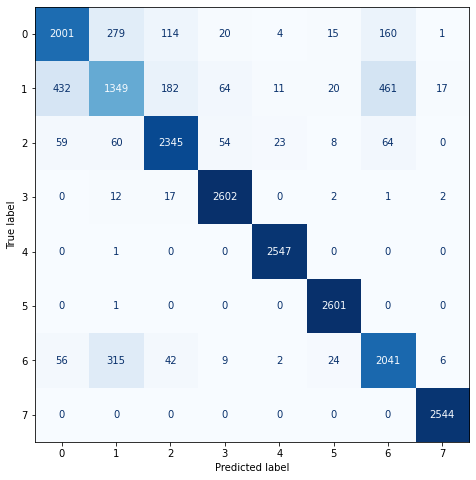

In [70]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax =  plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= model.classes_)
disp.plot(cmap = plt.cm.Blues , colorbar = False, ax = ax)

##### *Logistic Regression*

0.5156067677946324


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


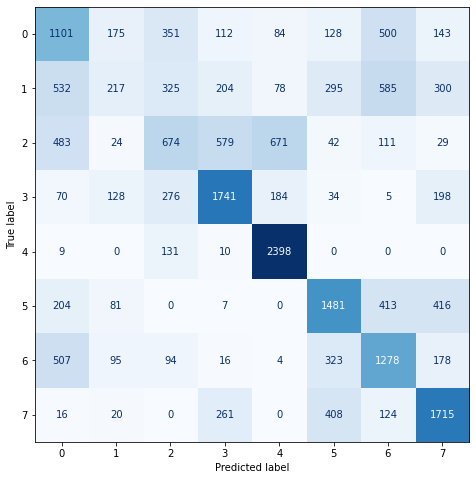

In [65]:
model = LogisticRegression(random_state=5,penalty='l2')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax =  plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= model.classes_)
disp.plot(cmap = plt.cm.Blues , colorbar = False, ax = ax)

##### *SVC Classifier*

0.8210326721120187


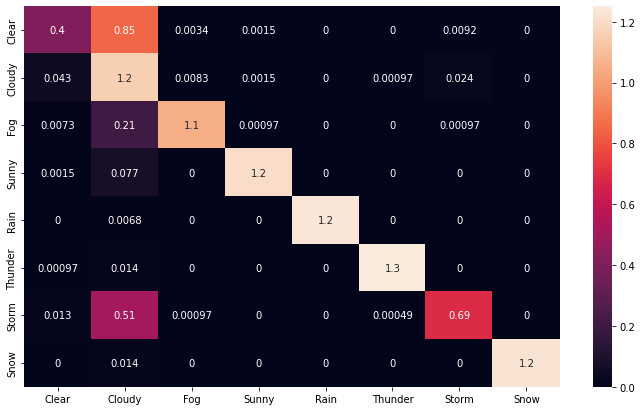

In [46]:
model = SVC(gamma='auto')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax =  plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= model.classes_)
disp.plot(cmap = plt.cm.Blues , colorbar = False, ax = ax)

##### *SGD Classifier*

0.42580707895760406


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


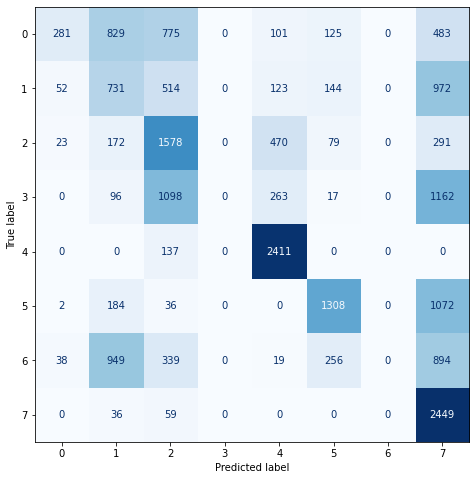

In [66]:
model = SGDClassifier( penalty="l2", max_iter=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print(accuracy_score(y_test,y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax =  plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= model.classes_)
disp.plot(cmap = plt.cm.Blues , colorbar = False, ax = ax)

##### *Gaussian Navie Bayes Classifier*

0.6038020225593155


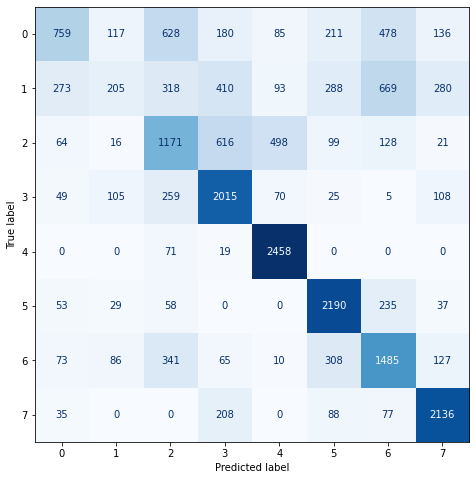

In [67]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print(accuracy_score(y_test,y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax =  plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= model.classes_)
disp.plot(cmap = plt.cm.Blues , colorbar = False, ax = ax)

##### *K Neighbors Classifier*

0.6720147802411514


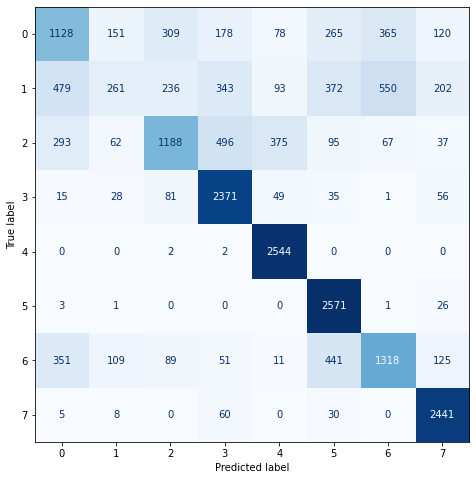

In [68]:
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print(accuracy_score(y_test,y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax =  plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(cf_matrix, display_labels= model.classes_)
disp.plot(cmap = plt.cm.Blues , colorbar = False, ax = ax)